In [1]:
import plotly.io as pio
pio.renderers.default = "notebook+pdf"  # Renderer for Notebook and HTML exports + Renderer for PDF exports

# Test

In [2]:
import io
import pandas as pd
import datetime
import numpy as np
import os

# load dataset
data_path = "/Users/lucie/Desktop/Cours mention/IA/Projet ML/airbnb-berlin-price-prediction-ml-2223/Data/train_airbnb_berlin.csv"
df = pd.read_csv(data_path)

# clean dataset
def clean_df(df):
    to_drop = ['Listing Name', 'Host Name', 'City', 'Country Code', 'Country', 'Square Feet']
    df = df.drop(to_drop, axis = 1)
    df.columns = df.columns.str.replace(' ','_')
    df = df.replace('*', np.nan)
    df = df.replace('%', '', regex = True)

    # set data_type
    data_type = {'Listing_ID' : 'float', 'Host_ID' : 'float', 'Host_Since' : 'datetime64', 'Host_Response_Time' : 'string',
        'Host_Response_Rate' : 'float', 'Is_Superhost' : 'bool', 'neighbourhood' : 'str',
        'Neighborhood_Group' : 'str', 'Postal_Code' : 'float', 'Latitude' : 'float', 'Longitude' : 'float',
        'Is_Exact_Location' : 'bool', 'Property_Type' : 'str', 'Room_Type' : 'str', 'Accomodates' : 'float',
        'Bathrooms' : 'float', 'Bedrooms' : 'float', 'Beds' : 'float', 'Guests_Included' : 'float', 'Min_Nights' : 'float',
        'Reviews' : 'float', 'First_Review' :'datetime64', 'Last_Review' : 'datetime64', 'Overall_Rating' : 'float',
        'Accuracy_Rating' : 'float', 'Cleanliness_Rating' : 'float', 'Checkin_Rating' : 'float',
        'Communication_Rating' : 'float', 'Location_Rating' : 'float', 'Value_Rating' : 'float',
        'Instant_Bookable' : 'bool', 'Business_Travel_Ready' : 'bool', 'Price' : 'float'}

    df = df.astype(data_type)
    return df

df = clean_df(df)

# stats on datas
def print_stats(df): 
    stats_df = pd.DataFrame({
        "min":df.min(numeric_only = True), 
        "max":df.max(numeric_only = True), 
        "mean":df.mean(numeric_only = True),
        "std":df.std(numeric_only = True),
        "median":df.median(numeric_only = True),
        "nunique":df.nunique(), 
        "count_na": df.isna().sum()    
    })
    return stats_df
                             
print_stats(df)

,min,max,mean,std,median,nunique,count_na
Accomodates,1.0,16.0,2.623301e+00,1.401659e+00,2.000000e+00,12,19
Accuracy_Rating,2.0,10.0,9.717475e+00,6.717927e-01,1.000000e+01,7,2971
Bathrooms,0.0,3.0,1.087732e+00,2.777624e-01,1.000000e+00,7,25
Bedrooms,0.0,5.0,1.143850e+00,6.142703e-01,1.000000e+00,6,16
Beds,0.0,10.0,1.593925e+00,1.071550e+00,1.000000e+00,11,20
Business_Travel_Ready,True,True,1.000000e+00,0.000000e+00,1.000000e+00,1,0
Checkin_Rating,2.0,10.0,9.769164e+00,6.203466e-01,1.000000e+01,8,2973
Cleanliness_Rating,2.0,10.0,9.328407e+00,1.023807e+00,1.000000e+01,8,2970
Communication_Rating,2.0,10.0,9.779201e+00,6.195449e-01,1.000000e+01,8,2970
First_Review,NaN,NaN,NaN,NaN,NaN,2243,2705


# PCA

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def airbnb_PCA(df, features, target):
    
    # A enlever quand on aura clean la data
    df2 = df.dropna()
    
    # Separating out the features
    x = df2.loc[:, features].values
    # Separating out the target
    y = df2.loc[:,target].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    pca = PCA()
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
    #                           ,columns = ['PC'+str(i) for i in range(1,n+1)]
                              )
    principalDf.index = df2.index
    print(principalDf.shape)
    print(df2[target].shape)
    finalDf = pd.concat([principalDf, pd.Series(df2[target])], axis = 1)
    print(finalDf.shape)
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    
    # Plot the cumulative variance to identify optimal n_components
    fig, ax = plt.subplots()
    xi = np.arange(1, 4, step=1)
    y = np.cumsum(pca.explained_variance_ratio_)
    plt.ylim(0.0,1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, 20, step=50)) #change from 0-based array index to 1-based human-readable label
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    # Return PCA fields and target variable.
    return(finalDf)

(6775, 3)
(6775,)
(6775, 4)
[0.4338937 0.3329393 0.233167 ]


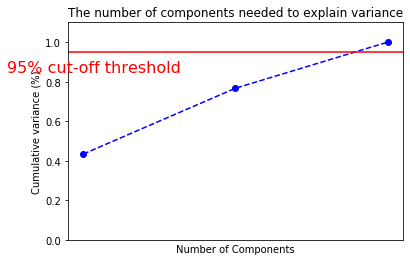

In [4]:
test = airbnb_PCA(df, ['Accomodates', 'Bathrooms', 'Min_Nights'], 'Price')

In [5]:
df.dropna().shape

(6775, 33)

In [6]:
test

,0,1,2,Price
7,2.746157,0.173607,1.665655,73.0
9,0.309436,0.075718,-0.775847,50.0
10,-0.576019,-0.350045,0.124945,50.0
11,-0.126333,-0.238347,-0.328339,58.0
17,0.272321,0.615365,-0.760441,50.0
...,...,...,...,...
15678,-1.034984,-0.326830,0.582081,28.0
15679,-0.121693,-0.305803,-0.330265,60.0
15682,-0.580659,-0.282589,0.126871,80.0
15687,0.619145,0.036180,1.355325,45.0


In [7]:
test[test.isnull().any(axis=1)]

,0,1,2,Price


# Train / Test / Validation data

In [ ]:
# trucs à faire quand la data sera belle et propre

In [8]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(test, test_size=0.2, random_state=42)


def income_cat_proportions(data):
    return data["Price"].value_counts() / len(data)


compare_props = pd.DataFrame({
    "Input_dataset": income_cat_proportions(test),
    "Test_set": income_cat_proportions(test_set),
}).sort_index()
compare_props["Test set. %error"] = 100 * compare_props["Test_set"] / compare_props["Input_dataset"] - 100

compare_props



,Input_dataset,Test_set,Test set. %error
8.0,0.000886,NaN,NaN
10.0,0.000886,0.002214,150.000000
11.0,0.000443,NaN,NaN
12.0,0.001033,0.000738,-28.571429
13.0,0.000295,NaN,NaN
...,...,...,...
559.0,0.000148,NaN,NaN
620.0,0.000148,NaN,NaN
650.0,0.000295,0.000738,150.000000
670.0,0.000148,NaN,NaN


In [ ]:
strat_train_set, strat_test_set =\
train_test_split(df, test_size=0.2, stratify=housing["Price"], random_state=42, shuffle=True)

compare_props = pd.DataFrame({
    "Input_dataset": income_cat_proportions(df),
    "Test_set": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set),
}).sort_index()
compare_props["Test set. %error"] = 100 * compare_props["Test_set"] / compare_props["Input_dataset"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Input_dataset"] - 100

compare_props

In [ ]:
# on fait du feature engineering?